## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
x.shape            # x[0] 

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digit = x[36001]
some_digit_image = some_digit.reshape(28, 28) # Lets reshape it to plot it

In [9]:
some_digit_image.shape

(28, 28)

(-0.5, 27.5, 27.5, -0.5)

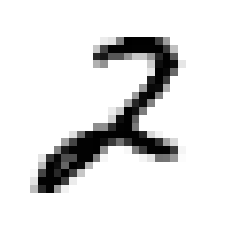

In [10]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis('off')

In [11]:
y[36001]

'2'

In [12]:
x_train, x_test = x[:60000], x[60000:]

In [13]:
y_train, y_test = y[:60000], y[60000:]

In [14]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating 2 detector

In [15]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [16]:
y_train

array([5, 7, 1, ..., 6, 1, 0], dtype=int8)

In [17]:
y_test_2

array([False,  True, False, ..., False, False, False])

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression()

In [20]:
clf.fit(x_train, y_train_2)

/Users/app/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
clf.predict([some_digit])

array([ True])

In [22]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv = 3, scoring="accuracy")

/Users/app/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/app/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [27]:
a

array([0.97805, 0.97855, 0.97895])

In [23]:
a.mean()

0.9785166666666667

## Quiz

Create a classifier which will classfy a digit always as "not 2"
For skewed dataset, its not good

In [24]:
from sklearn.model_selection import cross_val_predict 

In [25]:
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv = 3)

/Users/app/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/app/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [28]:
y_train_pred.shape

(60000,)

In [29]:
y_train_pred

array([False, False, False, ..., False, False, False])

## Calculating confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_train_2, y_train_pred)

array([[53559,   483],
       [  806,  5152]])

In [36]:
confusion_matrix(y_train_2, y_train_2) # confusion metrix for perfect predictions

array([[54042,     0],
       [    0,  5958]])

## Precision and Recall


In [34]:
from sklearn.metrics import precision_score, recall_score

In [40]:
precision_score(y_train_2, y_train_pred) # precision score

0.9142857142857143

In [42]:
recall_score(y_train_2, y_train_pred) # recall score

0.8647197045988587

## F1 - Score

In [43]:
from sklearn.metrics import f1_score

In [44]:
f1_score(y_train_2, y_train_pred)

0.8888122142672302

## Precision Recall Curve

In [45]:
from sklearn.metrics import precision_recall_curve

In [51]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv = 3, method="decision_function")

/Users/app/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/app/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [56]:
y_scores

array([-16.17097197,  -8.1443567 ,  -5.66500671, ..., -11.57563104,
        -7.01321889, -11.51233302])

In [57]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [58]:
precisions

array([0.10101901, 0.10100376, 0.10100548, ..., 1.        , 1.        ,
       1.        ])

In [59]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [60]:
thresholds

array([-24.22797457, -24.22365633, -24.21501761, ...,  18.42838462,
        18.60250291,  20.06664115])

## Plotting the Precision Recall Curve

<function matplotlib.pyplot.show(close=None, block=None)>

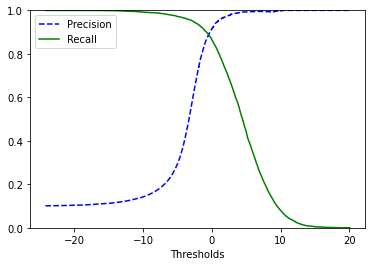

In [63]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim(0, 1)
plt.show